# Plot Nino index across all datasets

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from s2aenso.utils import preproc

In [2]:
# Load data
var = 'ssta'
paths = {
    'piControl': f"../../data/processed_data/cesm2_lens/piControl/b.e21.B1850.f09_g17.CMIP6-piControl.001.pop.h.{var}_lat-31_33_lon130_290_gr1.0.nc",
    'lens': f"../../data/processed_data/cesm2_lens/historical/cmip6_1001_001/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.{var}_lat-31_33_lon130_290_gr1.0.nc",
    'oras5': f"../../data/processed_data/oras5/{var}_lat-31_33_lon130_290_gr1.0.nc",
    'cera20c': f"../../data/processed_data/cera-20c/{var}_lat-31_33_lon130_290_gr1.0.nc"
}

nino_indices = {}
datasets = {}
for key, path in paths.items():
    da = xr.open_dataset(path)[var]
    datasets[key] = da
    nino34, _ = preproc.get_mean_time_series(da, lat_range=[-31, 33], lon_range=[190, 240], time_roll=0)
    nino_indices[key] = nino34


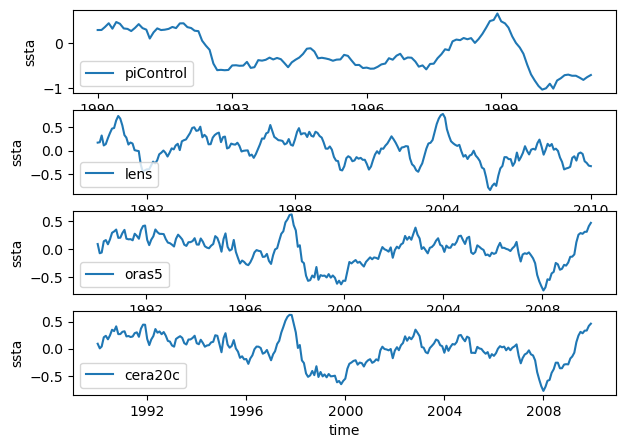

In [3]:
# Plot land-sea mask of each dataset
fig, axs = plt.subplots(len(nino_indices), 1, figsize=(7, 5))

for i, (key, nino34) in enumerate(nino_indices.items()):
    nino34.sel(time=slice('1990-01-01', '2010-01-01')).plot(ax=axs[i], label=key)
    axs[i].legend(loc=3)



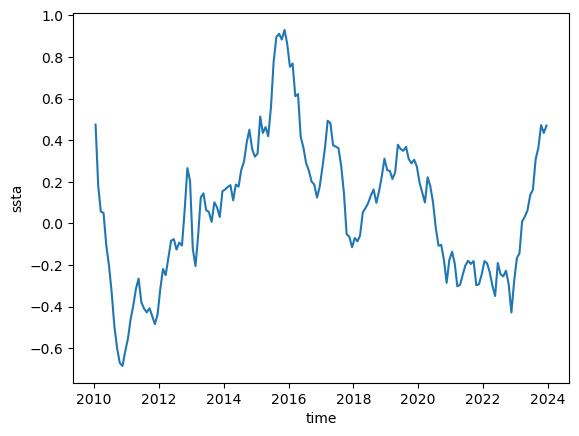

In [4]:
nino_indices['oras5'].sel(time=slice('2010-01-01', None)).plot()
#datasets['oras5'].sel(time='2023-11-01', method='nearest').plot()